In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'train.csv', 'test.csv']


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [33]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
sub = pd.read_csv("../input/sample_submission.csv")
sub['id'] = test['id']

In [34]:
train.head()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,...,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,...,0.971,-1.489,0.530,0.917,-0.094,-1.407,0.887,-0.104,-0.583,1.267,-1.667,-2.771,-0.516,1.312,0.491,0.932,2.064,0.422,1.215,2.012,0.043,-0.307,-0.059,1.121,1.333,0.211,1.753,0.053,1.274,-0.612,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,0.459,0.478,-0.425,0.352,1.095,0.300,-1.044,0.270,-1.038,0.144,-1.658,-0.946,0.633,-0.772,1.786,0.136,-0.103,-1.223,2.273,0.055,-2.032,-0.452,0.064,0.924,-0.692,-0.067,-0.917,1.896,...,-0.540,-0.299,1.074,-0.748,1.086,-0.766,-0.931,0.432,1.345,-0.491,-1.602,-0.727,0.346,0.780,-0.527,-1.122,-0.208,-0.730,-0.302,2.535,-1.045,0.037,0.020,1.373,0.456,-0.277,1.381,1.843,0.749,0.202,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,0.335,-1.148,0.067,-1.010,1.048,-1.442,0.210,0.836,-0.326,0.716,-0.764,0.248,-1.308,2.127,0.365,0.296,-0.808,1.854,0.118,0.380,0.999,-1.171,2.798,0.394,-1.048,1.078,0.401,-0.486,...,-0.083,-0.831,1.251,-0.206,-0.933,-1.215,0.281,0.512,-0.424,0.769,0.223,-0.710,2.725,0.176,0.845,-1.226,1.527,-1.701,0.597,0.150,1.864,0.322,-0.214,1.282,0.408,-0.910,1.020,-0.299,-1.574,-1.618,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,0.190,0.453,0.494,1.478,-1.412,0.270,-1.312,-0.322,-0.688,-0.198,-0.285,1.042,-0.315,-0.478,0.024,-0.190,1.656,-0.469,-1.437,-0.581,-0.308,-0.837,-1.739,0.037,0.336,-1.102,2.371,0.554,...,-1.050,-0.347,0.904,-1.324,-0.849,3.432,0.222,0.416,0.174,-1.517,-0.337,0.055,-0.464,0.014,-1.073,0.325,-0.523,-0.692,0.190,-0.883,-1.830,1.408,2.319,1.704,-0.723,1.014,0.064,0.096,-0.775,1.845,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


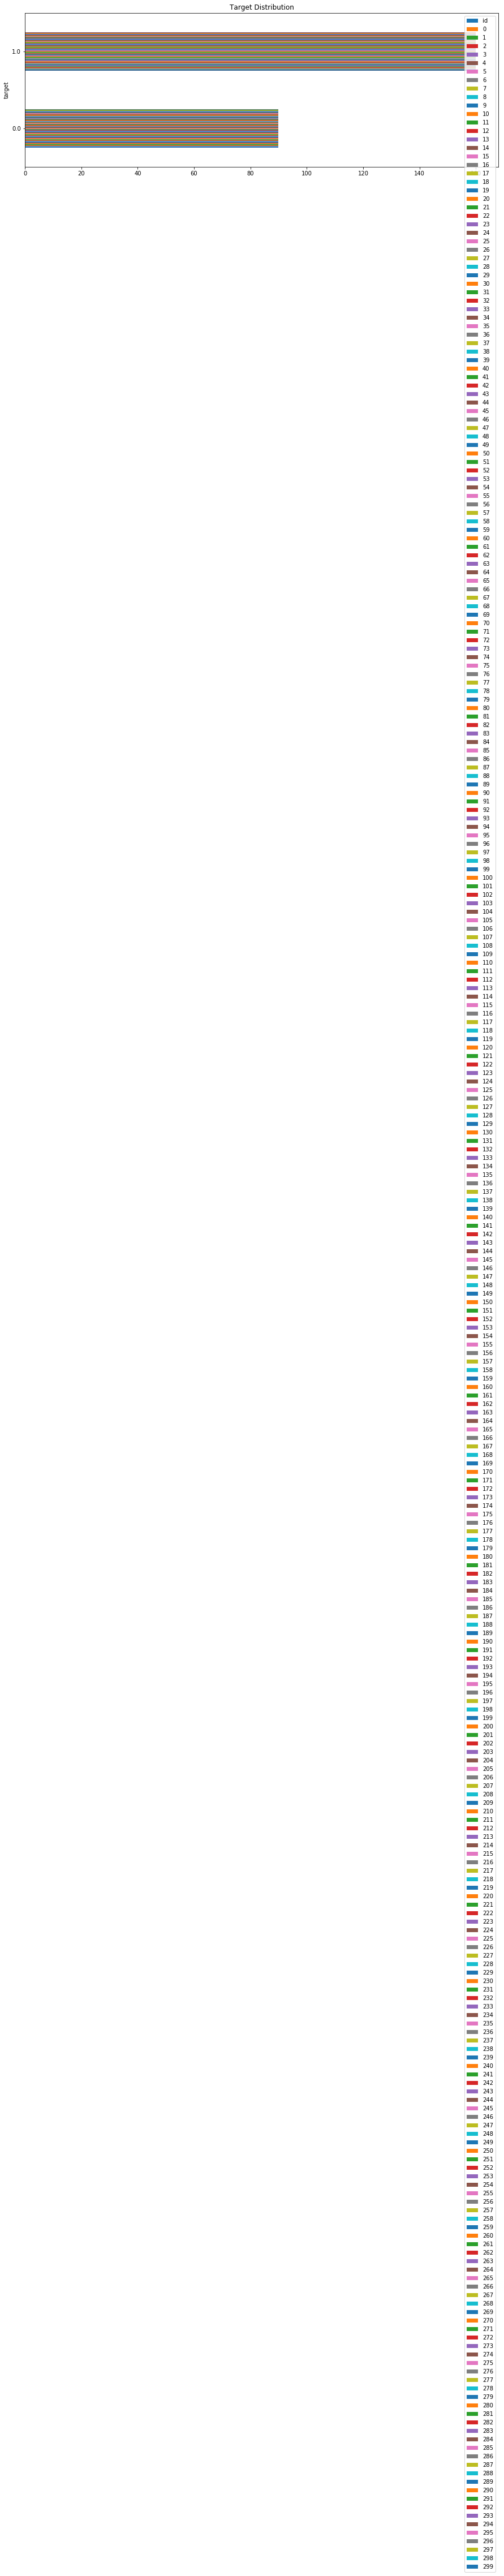

In [35]:
train.groupby('target').count().plot(kind='barh', title='Target Distribution', figsize=(15, 5))
plt.show()

In [36]:
train.describe()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,-0.036920,0.035448,-0.005032,0.110248,0.019808,-0.001108,-0.016280,-0.039644,0.017260,-0.106856,0.036184,-0.043296,-0.110832,0.072680,0.017296,-0.030728,-0.128252,0.154736,0.083408,0.039552,-0.091784,0.054636,-0.048288,-0.017296,0.007708,-0.134460,0.093852,-0.020588,-0.002492,-0.141400,...,0.005780,-0.102304,-0.013796,0.089384,0.036368,0.016276,-0.069448,-0.113236,0.035696,0.034484,-0.066236,-0.057988,0.091556,-0.029896,0.115648,0.007372,0.033552,0.090524,0.001576,-0.007784,0.043184,0.082696,0.098476,0.055356,0.111708,-0.015688,0.035992,0.026452,-0.059152,0.077272,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,0.963688,1.019689,1.085089,1.036265,1.050041,1.024305,0.926789,0.955915,1.025655,1.012777,0.945099,1.055935,1.003178,1.039556,0.988482,0.945902,0.997026,0.997894,1.040371,0.922270,1.047282,1.041432,1.010971,0.992464,0.986350,1.015563,1.117898,0.958191,0.948855,1.042429,...,0.994761,1.094494,1.026025,0.963489,1.026373,1.008207,0.989451,1.002857,0.944743,1.023709,0.985451,0.951879,1.027877,0.966882,1.037173,1.004543,1.006219,1.037119,1.024067,1.056086,1.012516,1.068741,0.934163,0.988100,1.043230,1.010720,1.058982,0.896318,1.113760,0.972530,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,-2.768000,-2.361000,-3.302000,-2.851000,-2.681000,-2.596000,-3.275000,-3.512000,-2.476000,-3.619000,-2.428000,-3.229000,-3.024000,-2.775000,-2.962000,-2.490000,-3.107000,-2.943000,-2.933000,-2.942000,-2.957000,-2.911000,-2.568000,-2.649000,-3.031000,-2.913000,-3.265000,-2.372000,-3.037000,-3.340000,...,-2.512000,-2.873000,-2.549000,-2.721000,-2.578000,-2.239000,-3.046000,-2.755000,-2.507000,-3.369000,-2.448000,-2.771000,-2.903000,-2.522000,-2.759000,-2.915000,-2.618000,-3.623000,-2.673000,-3.229000,-2.537000,-2.748000,-2.850000,-2.577000,-2.973000,-2.709000,-3.605000,-2.357000,-2.904000,-2.734000,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,-0.689500,-0.643500,-0.693500,-0.524000,-0.708500,-0.692000,-0.677000,-0.634500,-0.683500,-0.801500,-0.574250,-0.758000,-0.870500,-0.596000,-0.725750,-0.652000,-0.779500,-0.424250,-0.585750,-0.625000,-0.751250,-0.582500,-0.713500,-0.750000,-0.588000,-0.829000,-0.648500,-0.659750,-0.614000,-0.816750,...,-0.622750,-1.009250,-0.693250,-0.567750,-0.696500,-0.684000,-0.703750,-0.771250,-0.624500,-0.653000,-0.786750,-0.701000,-0.54

In [37]:
train_X = train.drop(['id','target'], axis=1).as_matrix()
train_y = train['target'].values
test = test.drop(labels = 'id', axis = 1)

In [38]:
test.shape

(19750, 300)

In [39]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import xgboost as xgb


for model_type in [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier,
                   AdaBoostClassifier, xgb.XGBClassifier]:
    clf = model_type()
    kfold = KFold(n_splits=5, shuffle=True)
    cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
    scores = cross_val_score(clf, train_X, train_y, cv=cv, scoring='roc_auc')
    print("{} Accuracy: {})".format(model_type.__name__, scores.mean()))

LogisticRegression Accuracy: 0.7276267428760044)
KNeighborsClassifier Accuracy: 0.5776430038068362)
DecisionTreeClassifier Accuracy: 0.5595534044806066)
RandomForestClassifier Accuracy: 0.5687992854427482)
AdaBoostClassifier Accuracy: 0.6695741860943708)
XGBClassifier Accuracy: 0.7000196549496966)


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

clf = LogisticRegression(class_weight='balanced', solver='liblinear')

# Search through these optino
penalty = ['l1', 'l2']
C = uniform(loc=0, scale=4)
hyperparameters = dict(C=C, penalty=penalty)

rand_cv = RandomizedSearchCV(clf, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1, scoring='roc_auc')
best_model = rand_cv.fit(train_X, train_y)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


Best Penalty: l1
Best C: 0.1782075141790469


In [41]:
pred = rand_cv.predict(test)

In [42]:
pred

array([1., 1., 1., ..., 0., 1., 0.])

In [43]:
#roc_auc_score(y_test, pre)

In [44]:
#pred = ad.predict(test)

In [45]:
len(pred)

19750

In [46]:
test.shape

(19750, 300)

In [47]:

sub['target'] = pred

In [48]:
sub.head(23)

,id,target
0,250,1.0
1,251,1.0
2,252,1.0
3,253,1.0
4,254,1.0
5,255,0.0
6,256,0.0
7,257,0.0
8,258,1.0
9,259,0.0


In [49]:
sub.to_csv("sub.csv",index= False)
